# PyTorch 循环神经网络（RNN）

循环神经网络（Recurrent Neural Networks, RNN）是一类神经网络架构，专门用于处理序列数据，能够捕捉时间序列或有序数据的动态信息，能够处理序列数据，如文本、时间序列或音频。

RNN 在自然语言处理（NLP）、语音识别、时间序列预测等任务中有着广泛的应用。

RNN 的关键特性是其能够保持隐状态（hidden state），使得网络能够记住先前时间步的信息，这对于处理序列数据至关重要。

RNN 的基本结构
在传统的前馈神经网络（Feedforward Neural Network）中，数据是从输入层流向输出层的，而在 RNN 中，数据不仅沿着网络层级流动，还会在每个时间步骤上传播到当前的隐层状态，从而将之前的信息传递到下一个时间步骤。

隐状态（Hidden State）： RNN 通过隐状态来记住序列中的信息。

隐状态是通过上一时间步的隐状态和当前输入共同计算得到的。

## PyTorch 中的 RNN 基础

在 PyTorch 中，RNN 可以用于构建复杂的序列模型。

PyTorch 提供了几种 RNN 模块，包括：

- torch.nn.RNN：基本的RNN单元。

- torch.nn.LSTM：长短期记忆单元，能够学习长期依赖关系。

- torch.nn.GRU：门控循环单元，是LSTM的简化版本，但通常更容易训练。

使用 RNN 类时，您需要指定输入的维度、隐藏层的维度以及其他一些超参数。

## PyTorch 实现一个简单的 RNN 实例

以下是一个简单的 PyTorch 实现例子，使用 RNN 模型来处理序列数据并进行分类。

1、导入必要库

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

2、定义 RNN 模型

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        # 定义 RNN 层
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        # 定义全连接层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        out, _ = self.rnn(x)  # out: (batch_size, seq_len, hidden_size)
        # 取序列最后一个时间步的输出作为模型的输出
        out = out[:, -1, :]  # (batch_size, hidden_size)
        out = self.fc(out)  # 全连接层
        return out

3、创建训练数据

为了训练 RNN，我们生成一些随机的序列数据。这里的目标是将每个序列的最后一个值作为分类的目标。

In [ ]:
# 生成一些随机序列数据
num_samples = 1000
seq_len = 10
input_size = 5
output_size = 2  # 假设二分类问题

# 随机生成输入数据 (batch_size, seq_len, input_size)
X = torch.randn(num_samples, seq_len, input_size)
# 随机生成目标标签 (batch_size, output_size)
Y = torch.randint(0, output_size, (num_samples,))

# 创建数据加载器
dataset = TensorDataset(X, Y)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

4、定义损失函数与优化器

In [ ]:
# 模型实例化
model = SimpleRNN(input_size=input_size, hidden_size=64, output_size=output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

5、训练模型

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

6、测试模型

训练结束后，我们可以在测试集上评估模型的表现。

In [ ]:
# 测试模型
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    total = 0
    correct = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

7、完整代码如下：

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 数据集：字符序列预测（Hello -> Elloh）
char_set = list("hello")
char_to_idx = {c: i for i, c in enumerate(char_set)}
idx_to_char = {i: c for i, c in enumerate(char_set)}

# 数据准备
input_str = "hello"
target_str = "elloh"
input_data = [char_to_idx[c] for c in input_str]
target_data = [char_to_idx[c] for c in target_str]

# 转换为独热编码
input_one_hot = np.eye(len(char_set))[input_data]

# 转换为 PyTorch Tensor
inputs = torch.tensor(input_one_hot, dtype=torch.float32)
targets = torch.tensor(target_data, dtype=torch.long)

# 模型超参数
input_size = len(char_set)
hidden_size = 8
output_size = len(char_set)
num_epochs = 200
learning_rate = 0.1

# 定义 RNN 模型
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)  # 应用全连接层
        return out, hidden

model = RNNModel(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练 RNN
losses = []
hidden = None  # 初始隐藏状态为 None
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # 前向传播
    outputs, hidden = model(inputs.unsqueeze(0), hidden)
    hidden = hidden.detach()  # 防止梯度爆炸

    # 计算损失
    loss = criterion(outputs.view(-1, output_size), targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 测试 RNN
with torch.no_grad():
    test_hidden = None
    test_output, _ = model(inputs.unsqueeze(0), test_hidden)
    predicted = torch.argmax(test_output, dim=2).squeeze().numpy()

    print("Input sequence: ", ''.join([idx_to_char[i] for i in input_data]))
    print("Predicted sequence: ", ''.join([idx_to_char[i] for i in predicted]))

Epoch [20/200], Loss: 0.0096
Epoch [40/200], Loss: 0.0009
Epoch [60/200], Loss: 0.0005
Epoch [80/200], Loss: 0.0005
Epoch [100/200], Loss: 0.0004
Epoch [120/200], Loss: 0.0004
Epoch [140/200], Loss: 0.0003
Epoch [160/200], Loss: 0.0003
Epoch [180/200], Loss: 0.0003
Epoch [200/200], Loss: 0.0002
Input sequence:  hello
Predicted sequence:  elloh


代码解析：

1. 数据准备：

      使用字符序列 hello，并将其转化为独热编码。

      目标序列为 elloh，即向右旋转一个字符。

2. 模型构建：

      使用 torch.nn.RNN 创建循环神经网络。

      加入全连接层 torch.nn.Linear 用于映射隐藏状态到输出。

3. 训练部分：

      每一轮都计算损失并反向传播。

      隐藏状态通过 hidden.detach() 防止梯度爆炸。

4. 测试部分：

      模型输出字符的预测结果。

5. 可视化：

      用 Matplotlib 绘制训练损失的变化趋势。

8、可视化代码：

Epoch [20/200], Loss: 0.0020
Epoch [40/200], Loss: 0.0002
Epoch [60/200], Loss: 0.0001
Epoch [80/200], Loss: 0.0001
Epoch [100/200], Loss: 0.0001
Epoch [120/200], Loss: 0.0001
Epoch [140/200], Loss: 0.0001
Epoch [160/200], Loss: 0.0001
Epoch [180/200], Loss: 0.0001
Epoch [200/200], Loss: 0.0001
Input sequence:  hello
Predicted sequence:  elloh


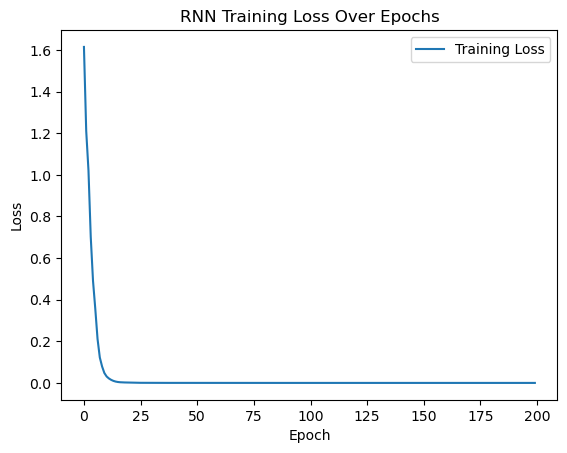

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 数据集：字符序列预测（Hello -> Elloh）
char_set = list("hello")
char_to_idx = {c: i for i, c in enumerate(char_set)}
idx_to_char = {i: c for i, c in enumerate(char_set)}

# 数据准备
input_str = "hello"
target_str = "elloh"
input_data = [char_to_idx[c] for c in input_str]
target_data = [char_to_idx[c] for c in target_str]

# 转换为独热编码
input_one_hot = np.eye(len(char_set))[input_data]

# 转换为 PyTorch Tensor
inputs = torch.tensor(input_one_hot, dtype=torch.float32)
targets = torch.tensor(target_data, dtype=torch.long)

# 模型超参数
input_size = len(char_set)
hidden_size = 8
output_size = len(char_set)
num_epochs = 200
learning_rate = 0.1

# 定义 RNN 模型
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)  # 应用全连接层
        return out, hidden

model = RNNModel(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练 RNN
losses = []
hidden = None  # 初始隐藏状态为 None
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # 前向传播
    outputs, hidden = model(inputs.unsqueeze(0), hidden)
    hidden = hidden.detach()  # 防止梯度爆炸

    # 计算损失
    loss = criterion(outputs.view(-1, output_size), targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 测试 RNN
with torch.no_grad():
    test_hidden = None
    test_output, _ = model(inputs.unsqueeze(0), test_hidden)
    predicted = torch.argmax(test_output, dim=2).squeeze().numpy()

    print("Input sequence: ", ''.join([idx_to_char[i] for i in input_data]))
    print("Predicted sequence: ", ''.join([idx_to_char[i] for i in predicted]))

# 可视化损失
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN Training Loss Over Epochs")
plt.legend()
plt.show()